# Guided Project : Stochastic Gradient Descent on Linear Regression

* This dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. 
* It contains 11 columns that contain the following information.
* number_people: this is the number of people at the gym at each observation. This will be our target variable or label.
* date: a string value with the specific date and time information.
* timestamp: an integer (int), with the number of seconds since the start of the day (00:00).
* dayofweek: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
* is_weekend: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
* is_holiday: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
* temperature: a float, defining the temperature during the day of the observation in Fahrenheit.
* isstartof_semester: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
* is_during_semester: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
* month: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
* hour: an integer (int) for the hour of the day from 0 to 23.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
gym_df = pd.read_csv('crowdness_gym_data.csv')
gym_df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


#### Cleaning the data

In [3]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
gym_df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

#### We don’t have any missing values in our dataset.

In [5]:
gym_df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


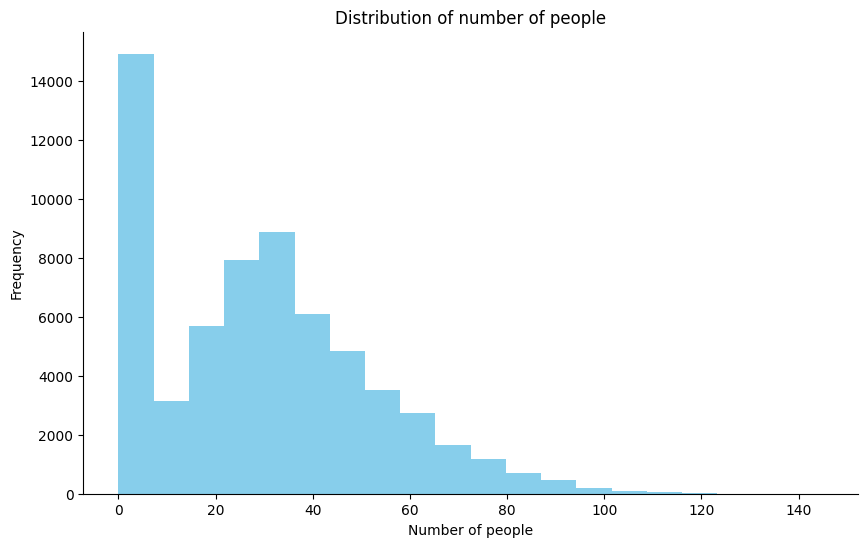

In [6]:
# Histogram of 'number_people'
plt.figure(figsize=(10,6))
plt.hist(gym_df['number_people'],bins = 20, color = 'skyblue')
plt.title('Distribution of number of people')
plt.xlabel('Number of people')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#### Observation:
* The histogram of 'number_people' shows that the distribution is skewed, with most values clustered around the lower end.

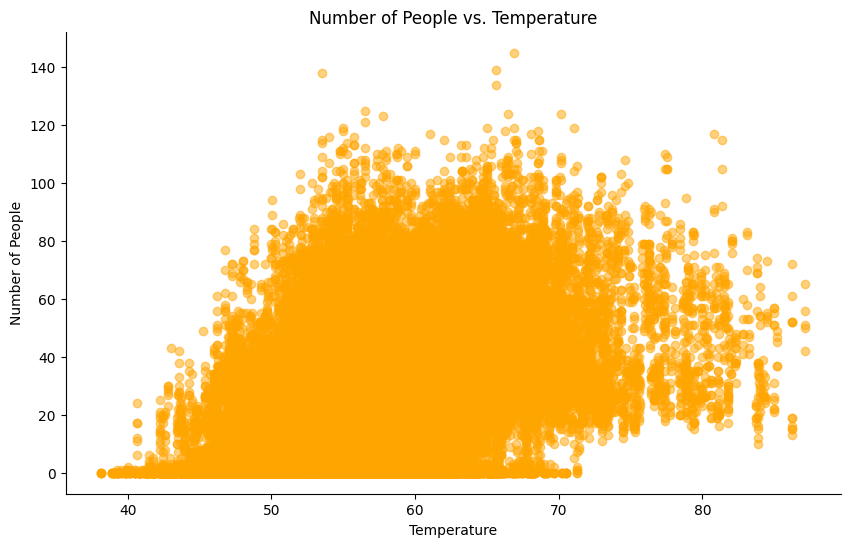

In [7]:
# Scatter plot of 'temperature' vs. 'number_people'
plt.figure(figsize=(10,6))
plt.scatter(gym_df['temperature'], gym_df['number_people'], color='orange', alpha=0.5)
plt.title('Number of People vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of People')
sns.despine()
plt.show()

#### Observation:
* he scatter plot of 'temperature' vs. 'number_people' doesn't show a clear trend, indicating that temperature alone may not be a strong predictor of gym crowdedness.

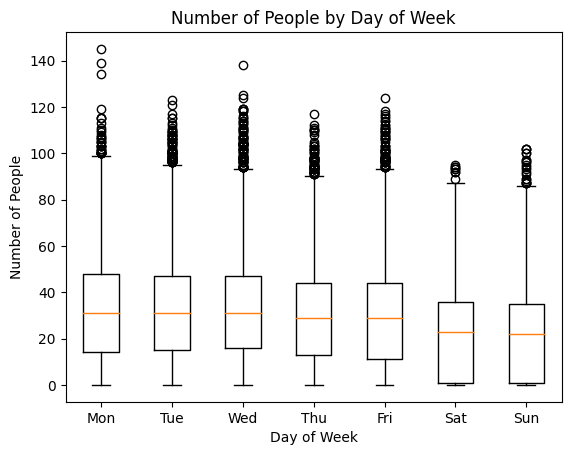

In [8]:
# Box plot of 'day_of_week' vs. 'number_people'
plt.boxplot([gym_df[gym_df['day_of_week'] == day]['number_people'] for day in range(7)], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Number of People by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of People')
plt.show()

#### Observation:
* The box plot of 'day_of_week' vs. 'number_people' reveals variations in gym crowdedness across different days of the week, with higher median values on weekends.

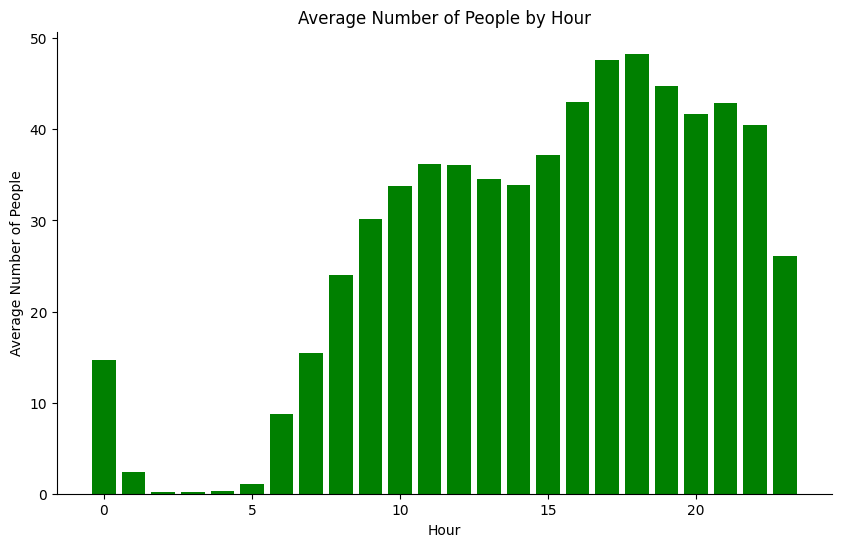

In [9]:
# Bar plot of 'hour' vs. average 'number_people'
plt.figure(figsize=(10,6))
avg_people_by_hour = gym_df.groupby('hour')['number_people'].mean()
plt.bar(avg_people_by_hour.index, avg_people_by_hour.values, color='green')
plt.title('Average Number of People by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of People')
sns.despine()
plt.show()

#### Observation:
* The bar plot of 'hour' vs. average 'number_people' highlights peak gym usage hours, with higher average numbers of people during certain times of the day, such as evenings.

In [10]:
# Removing unnecessary features
gym_df = gym_df.drop(columns=['date', 'timestamp', 'is_start_of_semester', 'is_during_semester'], axis=1)
gym_df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,month,hour
0,37,4,0,0,71.76,8,17
1,45,4,0,0,71.76,8,17
2,40,4,0,0,71.76,8,17
3,44,4,0,0,71.76,8,17
4,45,4,0,0,71.76,8,17


## Building the Model

In [11]:
# Split the data into training and testing sets
X = gym_df.drop(columns=['number_people'],axis=1)
y = gym_df['number_people']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=00.25, random_state=400)

In [13]:
# Build an SDGRegressor model with standard defaults
sgdr = SGDRegressor(alpha=0.001,tol=0.001,learning_rate='adaptive')

In [14]:
# fit the model on training data
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.001, learning_rate='adaptive')

##  Measure the Performance of the Model

In [15]:
# use model to make predictions
y_pred = sgdr.predict(X_test)

In [16]:
# Calculate the mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('MSE: ',mse)

# Calculate the mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',mae)

# Calculate the r2_score
r2 = r2_score(y_test,y_pred)
print('R2 Score: ',r2)

MSE:  292.5985368643939
MAE:  13.17867595758689
R2 Score:  0.42617411323656995


## Scale the data

In [17]:
X = gym_df.drop(columns=['number_people'],axis=1)
y = gym_df['number_people']

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [19]:
# build our training and test data from the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=2)

In [20]:
# Build an SDGRegressor model with standard defaults
sgdr = SGDRegressor(alpha=0.001,tol=0.001,learning_rate='adaptive')

In [21]:
# fit the model on training data
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.001, learning_rate='adaptive')

In [22]:
# use model to make predictions
y_pred = sgdr.predict(X_test)

In [23]:
# Calculate the mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('MSE after scaling: ',mse)

# Calculate the mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('MAE after scaling: ',mae)

# Calculate the r2_score
r2 = r2_score(y_test,y_pred)
print('R2 Score after scaling: ',r2)

MSE after scaling:  296.71892482138634
MAE after scaling:  13.327187826165552
R2 Score after scaling:  0.42041950939717787


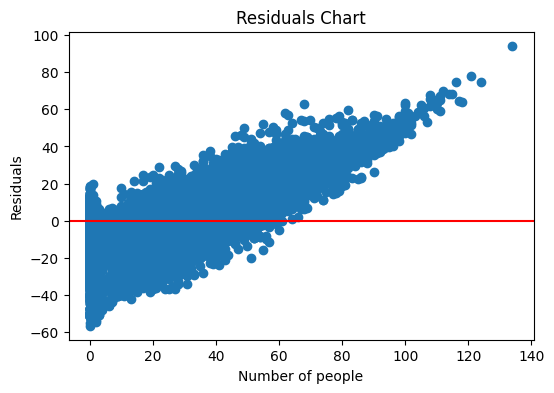

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.xlabel('Number of people')
plt.ylabel('Residuals')
plt.title('Residuals Chart')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

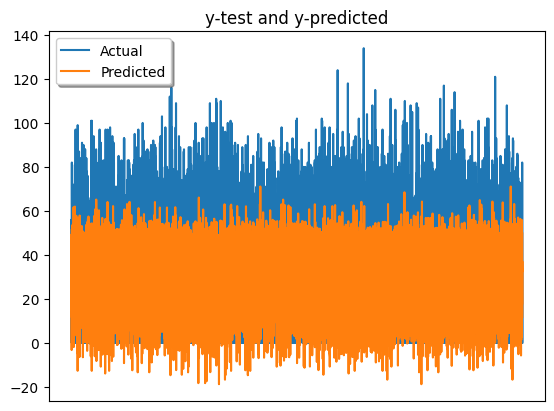

In [25]:
ax = range(len(y_test))
plt.plot(ax, y_test, label="Actual")
plt.plot(ax, y_pred, label="Predicted")
plt.title("y-test and y-predicted")
plt.tick_params(
    bottom=False,      
    labelbottom=False) 
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show() 

#### Observation:
* The orange lines represent the model's predictions. 
* Sometimes it underpredicting like it predicts a negative 'number_people' at gym.

#### Conclusions:
* Weekend Effect: The observation of higher median values of gym crowdedness on weekends suggests that weekends are peak times for gym attendance. This information could be useful for gym management in scheduling staff or planning promotions.
* Additional Factors: While temperature alone may not be a strong predictor of gym crowdedness, it's possible that other factors not included in the dataset, such as promotions or events, could influence gym attendance. Further analysis with additional data may provide more insights.
* To improve prediction accuracy, we can try using a more sophisticated model such as a Random Forest regressor. Random Forests are an ensemble learning method that builds multiple decision trees during training and averages the predictions of individual trees to improve accuracy and reduce overfitting. 